<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/Julien_MLP_Digits_Recognition_128x64x32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import plot_model

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


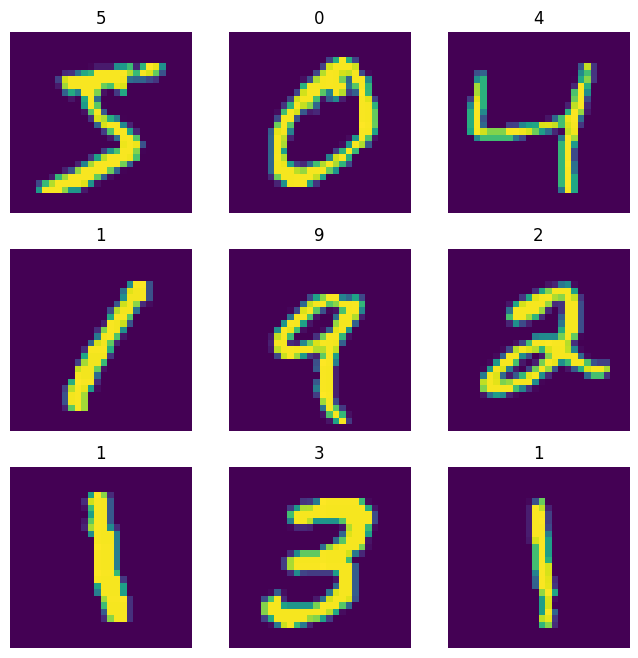

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


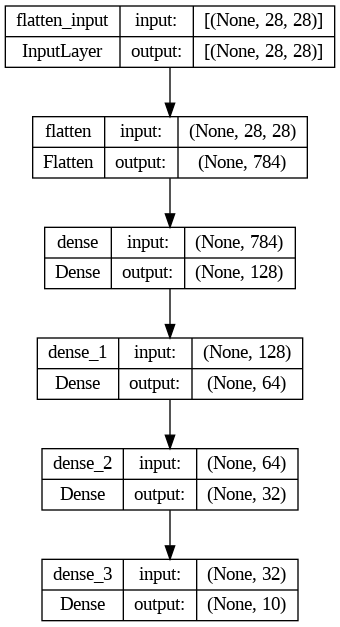

In [9]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6519 - accuracy: 0.8036 - val_loss: 0.4808 - val_accuracy: 0.8900
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2694 - accuracy: 0.9207 - val_loss: 0.3442 - val_accuracy: 0.9231
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1975 - accuracy: 0.9413 - val_loss: 0.3060 - val_accuracy: 0.9329
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1553 - accuracy: 0.9536 - val_loss: 0.2314 - val_accuracy: 0.9498
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1250 - accuracy: 0.9619 - val_loss: 0.2013 - val_accuracy: 0.9562
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1053 - accuracy: 0.9681 - val_loss: 0.1995 - val_accuracy: 0.9596
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0890 - accuracy: 0.9728 - val_loss: 0.2050 - val_accuracy: 0.9588
Epo

In [12]:
{layer.name: layer.get_weights() for layer in model.layers}

{'flatten': [],
 'dense': [array([[ 0.03547139, -0.05241855, -0.02439486, ..., -0.00240112,
          -0.05535072, -0.0789917 ],
         [-0.02512815, -0.00408201, -0.03644567, ..., -0.01239858,
          -0.0768055 ,  0.04894643],
         [-0.04367124, -0.07610172,  0.04149651, ..., -0.05393982,
           0.07152524, -0.07514869],
         ...,
         [-0.0731652 , -0.03108487, -0.05418473, ..., -0.02544228,
           0.05989141, -0.07864229],
         [-0.0752356 ,  0.02309608,  0.01462734, ...,  0.00721146,
           0.07768968, -0.04071729],
         [ 0.01721068,  0.00738984, -0.04535866, ..., -0.04249905,
          -0.00789335, -0.02952388]], dtype=float32),
  array([-0.00513113,  0.02603385, -0.01702379, -0.00469344, -0.0334588 ,
          0.00528959, -0.00565111,  0.00427908,  0.03343162, -0.02681775,
          0.02805401, -0.00994905,  0.01640742, -0.00237894,  0.01398507,
          0.01770015,  0.02305304,  0.06181608, -0.02280825,  0.00385145,
         -0.00131882, -0

In [18]:
weights1, biases1 = model.layers[1].get_weights()
print(weights1)

[[ 0.03547139 -0.05241855 -0.02439486 ... -0.00240112 -0.05535072
  -0.0789917 ]
 [-0.02512815 -0.00408201 -0.03644567 ... -0.01239858 -0.0768055
   0.04894643]
 [-0.04367124 -0.07610172  0.04149651 ... -0.05393982  0.07152524
  -0.07514869]
 ...
 [-0.0731652  -0.03108487 -0.05418473 ... -0.02544228  0.05989141
  -0.07864229]
 [-0.0752356   0.02309608  0.01462734 ...  0.00721146  0.07768968
  -0.04071729]
 [ 0.01721068  0.00738984 -0.04535866 ... -0.04249905 -0.00789335
  -0.02952388]]


In [19]:
# cannot easily visualize filters lower down
from matplotlib import pyplot
# normalize weights values to 0-1 so we can visualize them
#f_min, f_max = weights1.min(), weights1.max()
#weights1 = (weights1 - f_min) / (f_max - f_min)
print(weights1)

[[ 0.03547139 -0.05241855 -0.02439486 ... -0.00240112 -0.05535072
  -0.0789917 ]
 [-0.02512815 -0.00408201 -0.03644567 ... -0.01239858 -0.0768055
   0.04894643]
 [-0.04367124 -0.07610172  0.04149651 ... -0.05393982  0.07152524
  -0.07514869]
 ...
 [-0.0731652  -0.03108487 -0.05418473 ... -0.02544228  0.05989141
  -0.07864229]
 [-0.0752356   0.02309608  0.01462734 ...  0.00721146  0.07768968
  -0.04071729]
 [ 0.01721068  0.00738984 -0.04535866 ... -0.04249905 -0.00789335
  -0.02952388]]


In [20]:
# Get the weights from the first Hidden layer
print(weights1.shape)
# Get the weights from the second Hidden layer
weights2, biases2 = model.layers[2].get_weights()
print(weights2.shape)
# Get the weights from the third Hidden layer
weights3, biases3 = model.layers[3].get_weights()
print(weights3.shape)

(784, 128)
(128, 64)
(64, 32)


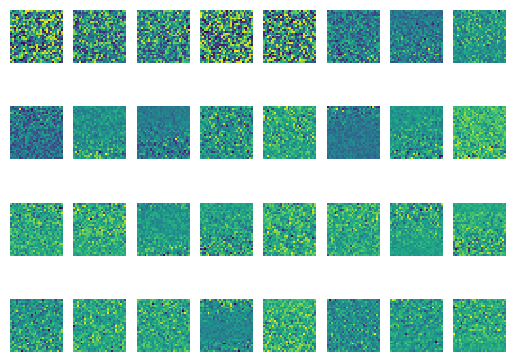

In [23]:
# normalize weights values to 0-1 so we can visualize them
#f_min, f_max = weights3.min(), weights3.max()
#weights3 = (weights3 - f_min) / (f_max - f_min)

# Check if the shape is compatible for reshaping
if weights1.shape != (28 * 28, 128):
    print("The shape of the weights array is not compatible for reshaping.")

# Reshape weights into  images of 8 by 8
weights1_images = weights1.reshape(-1, 28, 28)

# Plot the weights
fig, axes = plt.subplots(4, 8)
for i, ax in enumerate(axes.flat):
    ax.matshow(weights1_images[i], cmap='viridis')
#    ax.matshow(weights3_images[i], cmap=plt.cm.gray, vmin=f_min, vmax=f_max)
    ax.axis('off')

plt.show()

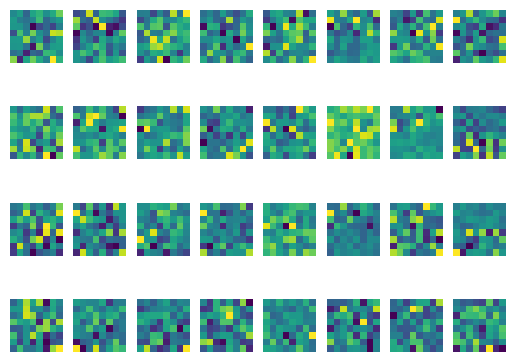

In [21]:
# normalize weights values to 0-1 so we can visualize them
#f_min, f_max = weights3.min(), weights3.max()
#weights3 = (weights3 - f_min) / (f_max - f_min)

# Check if the shape is compatible for reshaping
if weights3.shape != (8 * 8, 32):
    print("The shape of the weights array is not compatible for reshaping.")

# Reshape weights into  images of 8 by 8
weights3_images = weights3.reshape(-1, 8, 8)

# Plot the weights
fig, axes = plt.subplots(4, 8)
for i, ax in enumerate(axes.flat):
    ax.matshow(weights3_images[i], cmap='viridis')
#    ax.matshow(weights3_images[i], cmap=plt.cm.gray, vmin=f_min, vmax=f_max)
    ax.axis('off')

plt.show()

***... now you have to put your 10 digit images in content folder...***
these images have to be labelled digit_x.png, in an 28x28 resolution

In [24]:
import cv2

In [26]:
image = cv2.imread('digit_3.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 93ms/step
3


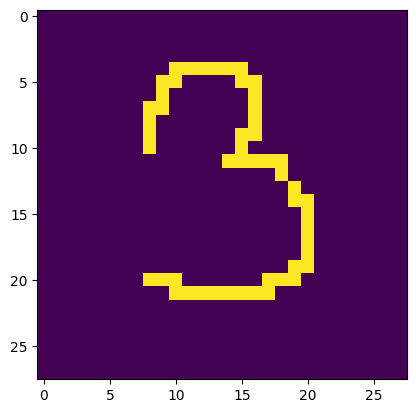

In [27]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [28]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [23]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.396s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [24]:
!streamlit run /content/julien_web_app.py &> /content/logs.txt &

In [25]:
!npx localtunnel --port 8501

npx: installed 22 in 2.19s
your url is: https://flat-pots-try.loca.lt
^C
